In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
def mutual_information(XYmat):
    p_y = np.sum(XYmat, axis=0)
    p_x = np.sum(XYmat, axis=1)

    mi = 0
    for i in range(XYmat.shape[0]):
        for j in range(XYmat.shape[1]):
            mi += XYmat[i][j]*np.log(XYmat[i][j]/(p_x[i]*p_y[j]))
    return mi

In [3]:
def calculate_for_all(var_type):
    raw = np.genfromtxt('mi/'+var_type+'.txt', delimiter='\t')
    for i in range(raw.shape[0]):
        for j in range(raw.shape[1]):
            if raw[i][j] == 0:
                raw[i][j] = 1e-8

    return [mutual_information(raw[0:3, :]), mutual_information(raw[3:6, :]), mutual_information(raw[6:9, :]), mutual_information(raw[9:11, :]), mutual_information(raw[11:13, :])]

In [4]:
index = ['literacy', 'formal emp', 'current status', 'MSL investment', 'MSW investment']
columns = ['asset', 'bf', 'fc', 'chh']
data = []
for attr in columns:
    data.append(calculate_for_all(attr))
    
data = np.asarray(data)
data = data.T
df = pd.DataFrame(index=index, columns=columns, data=data)

In [6]:
df.to_csv('mi/mutual-information.csv')

In [10]:
df = pd.read_csv('mi/mutual-information.csv')
# df.columns = ['index', 'asset', 'bf', 'fc', 'chh']
# df.reset_index('Unnamed: 0', inplace=True)
mat = np.asarray(df)

In [7]:
df.T.to_csv('mi-for-website.csv')

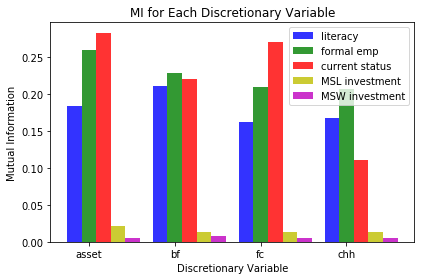

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.17
opacity = 0.8
 
rects1 = plt.bar(index, df.iloc[0, 1:], bar_width,
alpha=opacity,
color='b',
label=df.iloc[0, 0])
 
rects2 = plt.bar(index + bar_width, df.iloc[1, 1:], bar_width,
alpha=opacity,
color='g',
label=df.iloc[1, 0])

rects3 = plt.bar(index + 2*bar_width, df.iloc[2, 1:], bar_width,
alpha=opacity,
color='r',
label=df.iloc[2, 0])

rects4 = plt.bar(index + 3*bar_width, df.iloc[3, 1:], bar_width,
alpha=opacity,
color='y',
label=df.iloc[3, 0])

rects5 = plt.bar(index + 4*bar_width, df.iloc[4, 1:], bar_width,
alpha=opacity,
color='m',
label=df.iloc[4, 0])
 
plt.xlabel('Discretionary Variable')
plt.ylabel('Mutual Information')
plt.title('MI for Each Discretionary Variable')
plt.xticks(index + bar_width, ('asset', 'bf', 'fc', 'chh'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [11]:
import os
if not os.path.exists('mi/tables/'):
    os.makedirs('mi/tables/')
for attr in ['asset', 'bf', 'fc', 'chh']:
    raw = np.genfromtxt('mi/'+attr+'.txt', delimiter='\t')
    np.savetxt('mi/tables/'+attr+'-lit'+'.csv', raw[0:3, :],  fmt='%.3f', delimiter=', ',)
    np.savetxt('mi/tables/'+attr+'-form-emp'+'.csv', raw[3:6, :],  fmt='%.3f', delimiter=', ',)
    np.savetxt('mi/tables/'+attr+'-curr'+'.csv', raw[6:9, :],  fmt='%.3f', delimiter=', ',)
    np.savetxt('mi/tables/'+attr+'-msl'+'.csv', raw[9:11, :],  fmt='%.3f', delimiter=', ',)
    np.savetxt('mi/tables/'+attr+'-msw'+'.csv', raw[11:13, :],  fmt='%.3f', delimiter=', ',)

1.0000000000000009